In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
from keras.layers import Concatenate
from keras.utils import plot_model

In [35]:
# The data describe the characteristics of a house (surface, number of rooms...)
# and you should predict its price

# The metrics for the ranking will be based on the mean square error ('mse')

df_train = pd.read_csv("Train.csv")
df_train.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,77747,50,1,1,72,98938,8,10,2014,0,1,4829,4204,455,0,3,7786197.4
1,28459,52,0,0,4,50114,1,7,2012,1,1,3570,9363,318,0,6,2846923.2
2,34668,69,1,1,12,17366,8,7,2002,0,1,3476,7549,503,1,7,3475230.2
3,64335,4,0,0,83,65939,6,9,2020,1,0,7301,6989,802,0,1,6435779.0
4,22875,86,1,0,95,8661,5,7,1994,0,0,6394,2119,542,0,7,2295511.4


In [36]:
df_test = pd.read_csv("Test.csv")
df_test.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,92649,31,0,0,77,56098,10,8,1991,1,1,6811,2656,429,1,8,9271774.1
1,42485,1,0,0,40,23782,7,7,2017,0,1,974,9553,426,0,3,4251851.7
2,65867,37,0,0,92,67725,6,2,1994,1,1,3054,4650,998,1,10,6593211.4
3,2372,41,1,0,5,60320,1,1,2003,0,0,8041,7294,736,1,4,241014.3
4,60514,46,1,1,35,76413,2,1,2019,1,0,9227,737,340,0,8,6059360.9


In [37]:
# Separate input data/output data and store into numpy array

X_train = np.array(df_train.drop('price', axis=1))
y_train = np.array(df_train['price'])/10000

X_test = np.array(df_test.drop('price', axis=1))
y_test = np.array(df_test['price'])/10000

In [38]:
min, max = np.min(X_train, axis = 0), np.max(X_train, axis = 0)

X_train = (X_train - min)/(max - min)
X_test = (X_test - min)/(max - min)

In [39]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 16) (8000,)
(1000, 16) (1000,)


In [40]:
# define model

def create_model() :

    # Input layer
    x0 = [Input(shape = (16, )) for _ in range (16)]

    # Hiddens layer
    x1 = [Dense(3, input_dim = 16, activation = "relu")(x) for x in x0]

    x2 = [Dense(3, activation = "relu")(x) for x in x1]

    x3 = [Dense(3, activation = "relu")(x) for x in x2]

    x3_temp = x3.copy()

    x4 = [Concatenate()([x3[i], x3[i + 1]]) for i in range (0, len(x3), 2)]

    x5 = [Dense(6, activation = "relu")(x) for x in x4]

    x6 = [Dense(5, activation = "relu")(x) for x in x5]

    x7 = [Concatenate()([x6[i], x6[i + 1]] + x3_temp[2*i : int(4*(i/2 + 1))]) for i in range (0, len(x6), 2)]

    x8 = [Dense(8, activation = "relu")(x) for x in x7]

    x9 = [Dense(8, activation = "relu")(x) for x in x8]

    x10 = [Concatenate()([x9[i], x9[i + 1]]) for i in range (0, len(x9), 2)]

    x11 = [Dense(16, activation = "relu")(x) for x in x10]

    x12 = [Dense(16, activation = "relu")(x) for x in x11]

    x13 = Concatenate()(x12)

    x14 = Dense(256, activation = "relu")(x13)

    # # Output layer
    x15 = Dense(1)(x14)

    # Create model
    model = Model(inputs = x0, outputs = x15)

    plot_model(model, show_shapes = True, to_file = "model_graph_test.png") ;

    model.compile(optimizer = 'rmsprop', loss = ["mse"], metrics = ["mse"])

    return model

In [41]:
model = create_model()

c:\Users\natha\Documents\GitHub\4th year Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
history = model.fit([X_train for i in range (16)], y_train, epochs = 10, batch_size = 32)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 217868.8906 - mse: 217868.8906
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 34309.7227 - mse: 34309.7227
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1705.0944 - mse: 1705.0944
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1019.0439 - mse: 1019.0439
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 800.8511 - mse: 800.8511
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 667.4393 - mse: 667.4393
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 613.8719 - mse: 613.8719
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 577.4536 - mse: 577.4536
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 542.2943 - mse: 542.2943
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 531.6650 - mse: 531.6650


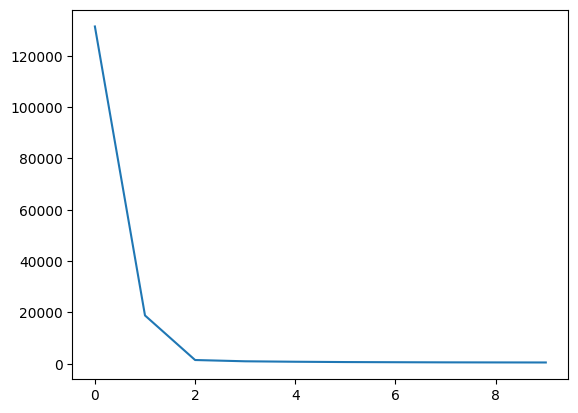

In [43]:
plt.plot(history.history["mse"])

In [44]:
# Import additionnal libraries

from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [45]:
validation_loss = []
history_list = []

In [46]:
kfold = KFold(n_splits = 5)

In [47]:
count = 0

for train_index, val_index in kfold.split(X_train, y_train) :
    model = create_model()

    stop = EarlyStopping(monitor = "mse", patience = 10, mode = "min")
    checkpoint = ModelCheckpoint("my_best_model" + str(count + 1) + ".keras", monitor = "mse", verbose = 0, save_best_only = True, mode = "min")
    callbacks = [stop, checkpoint]

    X_train_fold = X_train[train_index]
    y_train_fold = y_train[train_index]
    history = model.fit([X_train_fold for i in range (16)], y_train_fold, epochs = 100, callbacks = callbacks, batch_size = 32)
    history_list.append(history)
    validation_loss.append(model.evaluate([X_train[val_index] for i in range (16)], y_train[val_index], return_dict = True, verbose = 0)["loss"])
    
    count += 1

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 220417.7656 - mse: 220417.7656
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48335.8242 - mse: 48335.8242
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6361.3779 - mse: 6361.3779
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1579.7234 - mse: 1579.7234
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1103.5770 - mse: 1103.5770
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 804.0126 - mse: 804.0126
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 744.0437 - mse: 744.0437
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 611.7687 - mse: 611.7687
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 597.9328 - mse: 597.9328
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 580.4388 - mse: 580.4388
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 537.9453 - mse: 537.9453
Epoch 12/100
200/200 ━━━━━━━━━━━━━━

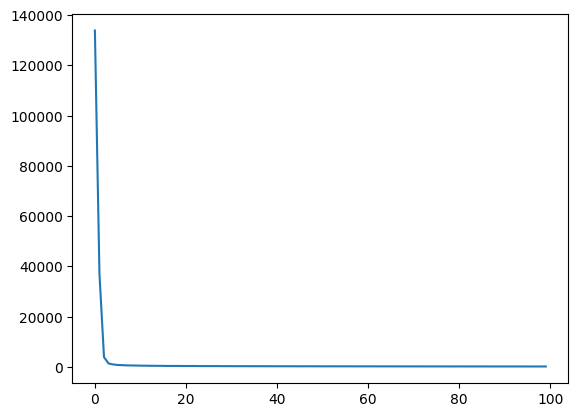

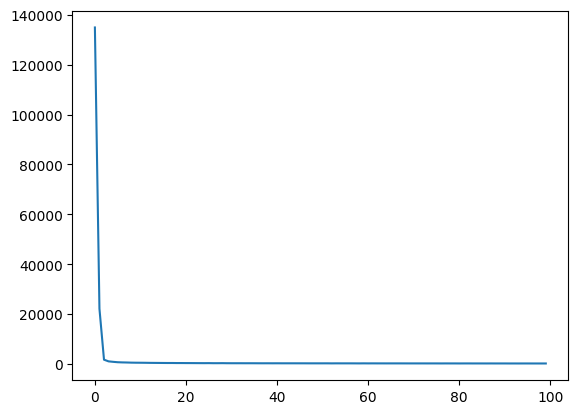

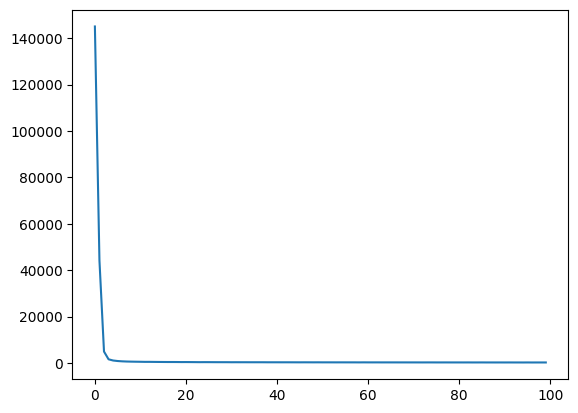

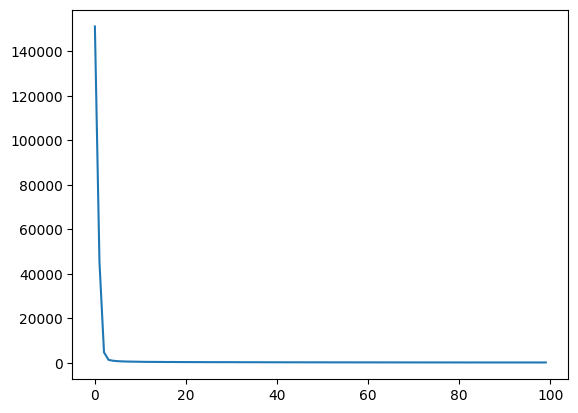

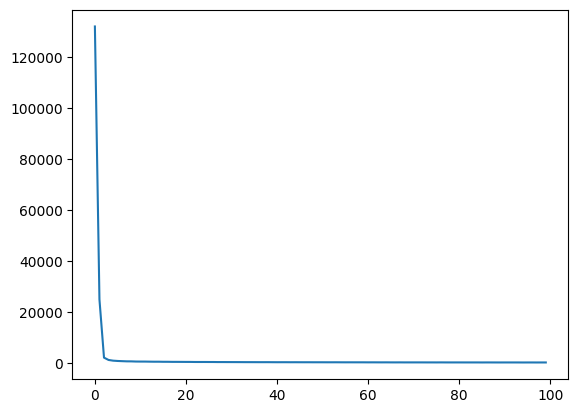

In [48]:
for hist in history_list :
    plt.plot(hist.history["loss"])
    plt.show()

In [49]:
print("average mse and standard deviation: ", np.mean(validation_loss), np.std(validation_loss))

average mse and standard deviation:  77.31069259643554 29.14120026937251


In [50]:
all_model = []
for i in range (1, 6) :
    all_model.append(load_model("my_best_model" + str(i) + ".keras"))

In [51]:
model_predict_moyenne = all_model[0].predict([X_test for i in range (16)])

for i in range(1, 5) :
    model_predict_moyenne += all_model[i].predict([X_test for i in range (16)])

model_predict_moyenne = np.round(model_predict_moyenne/5)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [52]:
print("mse : ", (1/1000)*np.sqrt(np.sum((model_predict_moyenne[:, 0] - y_test)**2)))

mse :  0.06752379272444776
